In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/marketing.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230,37,69,22.1
1,44,39,45,10.2
2,17,45,58,7.1
3,151,41,40,14.2
4,180,10,64,15.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         5 non-null      int64  
 1   Radio      5 non-null      int64  
 2   Newspaper  5 non-null      int64  
 3   Sales      5 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 288.0 bytes


<Axes: >

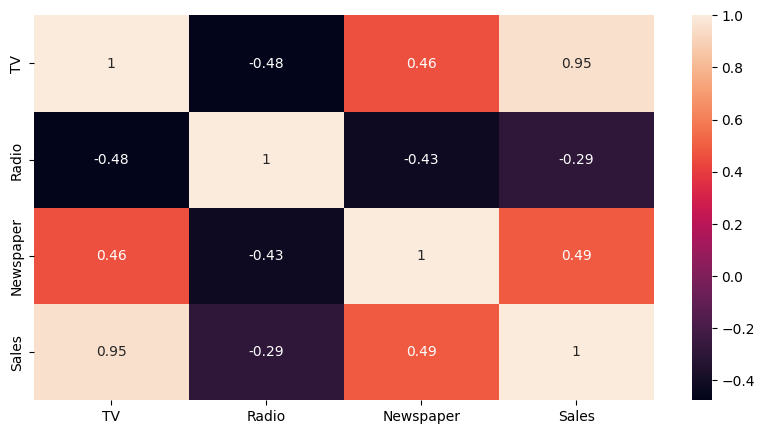

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

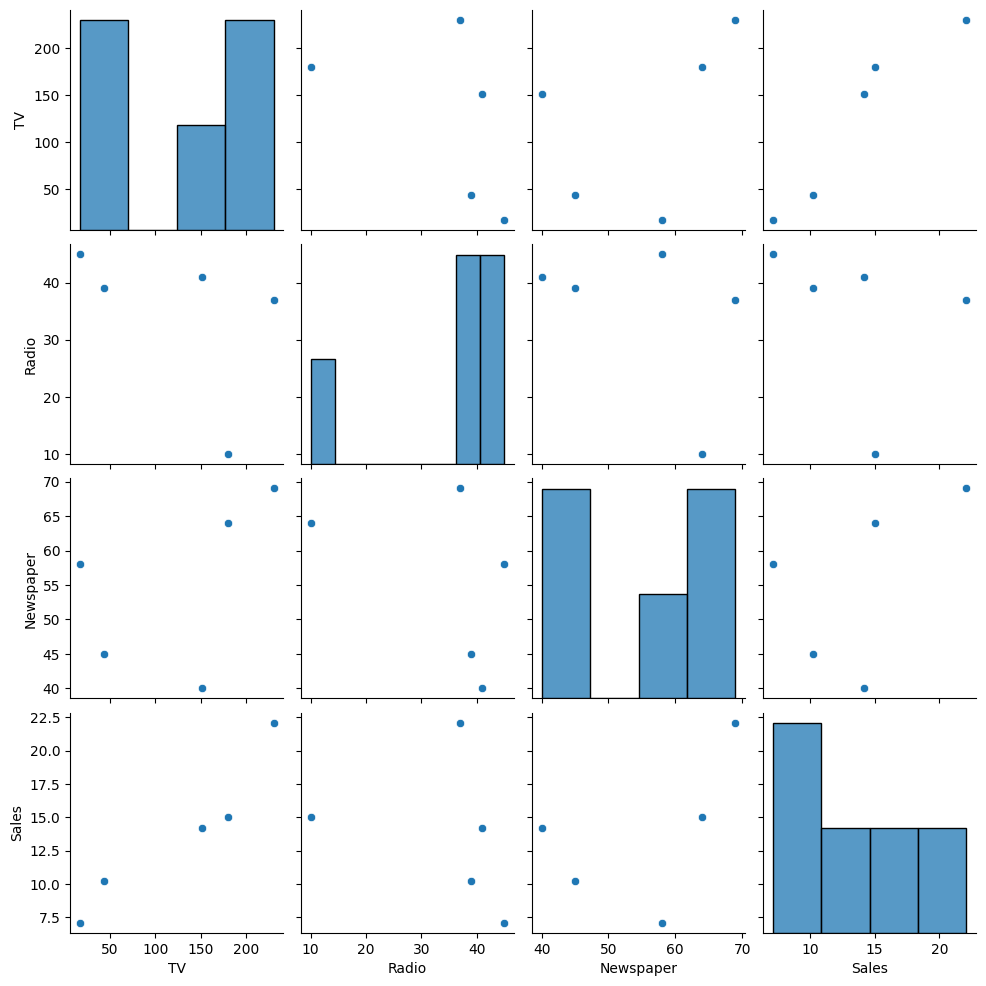

In [ ]:
sns.pairplot(data)

In [ ]:
X=data.drop('Sales',axis=1)
y=data['Sales']



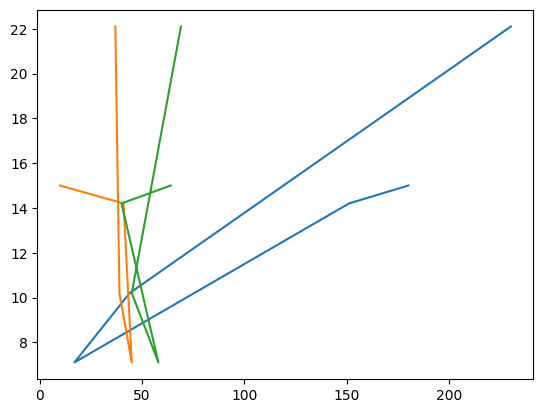

In [ ]:
plt.plot(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.predict(X_test)

array([7.00595257])

In [ ]:
import pandas as pd
# Get user input for TV, Radio, and Newspaper
tv_input = input()
radio_input = input()
newspaper_input = input()

# Create a DataFrame with an explicit index
user_input = pd.DataFrame(
    {'TV': [tv_input], 'Radio': [radio_input], 'Newspaper': [newspaper_input]},
    index=[0]  # Explicitly set the index
)


14
13
14


In [ ]:
model.predict(user_input)

array([-1.14734553])

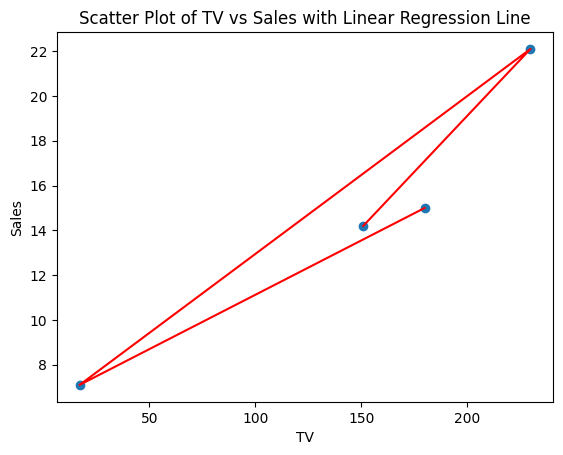

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['TV'], y_train)
plt.plot(X_train['TV'], model.predict(X_train), color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV vs Sales with Linear Regression Line')
plt.show()

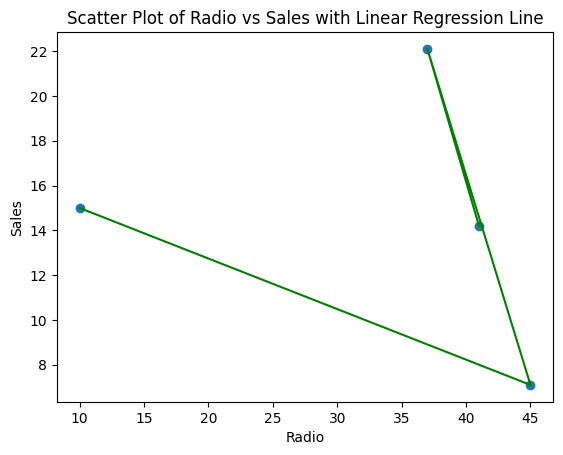

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Radio'], y_train)
plt.plot(X_train['Radio'], model.predict(X_train), color='green')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot of Radio vs Sales with Linear Regression Line')
plt.show()

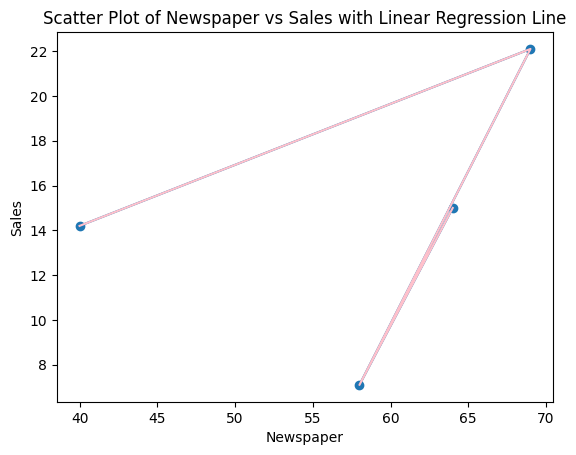

In [ ]:
plt.plot(X_train['Newspaper'],y_train)
plt.scatter(X_train['Newspaper'], y_train)
plt.plot(X_train['Newspaper'], model.predict(X_train), color='pink')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot of Newspaper vs Sales with Linear Regression Line')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
try:
    r2 = r2_score(y_test, y_pred)
except ValueError:
    r2 = None

# Display results
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2 if r2 is not None else 'Not defined (insufficient test samples)'}")

Model Evaluation:
Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 10.20
R² Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


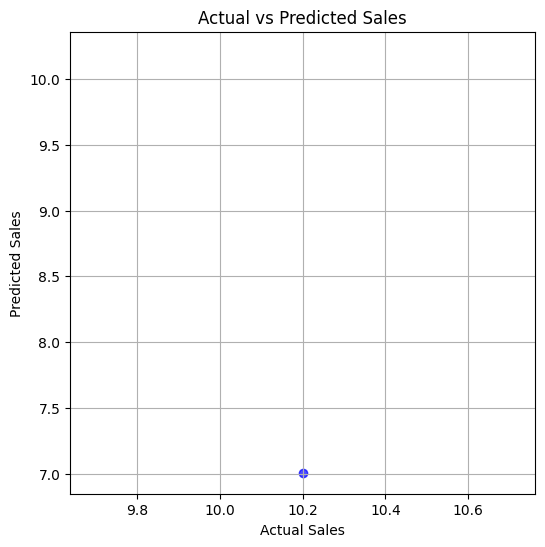

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()